In [1]:
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib 
import matplotlib.font_manager as fm
import random, copy

font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)


In [2]:
polygon_area = gpd.GeoDataFrame.from_file('미추홀구.shp', encoding='UTF8')
charger_point = pd.read_excel('미추홀구 전기차 충전소 위치.xlsx', dtype=str)
data=pd.read_excel('최종 통합 자료.xlsx', dtype=None)
norm_data =pd.read_excel('최종 데이터 통합본 (정규화).xlsx', dtype=None)
mid_point = data[['gid(격자)', 'xcoord(중심점 경도)', 'ycoord(중심점 위도)']]
polygon_area.head()

,EMD_CD,EMD_NM,SGG_OID,COL_ADM_SE,GID,유동인,geometry
0,28177103,학익동,692,28177,5255,235849,"POLYGON ((126.65985 37.44940, 126.65967 37.449..."
1,28177106,관교동,693,28177,5256,113092,"POLYGON ((126.68526 37.44269, 126.68505 37.442..."
2,28177102,용현동,694,28177,5257,273192,"POLYGON ((126.63911 37.46070, 126.64074 37.460..."
3,28177104,도화동,695,28177,5258,155309,"POLYGON ((126.67437 37.47561, 126.67412 37.471..."
4,28177107,문학동,696,28177,5259,68927,"POLYGON ((126.69052 37.44324, 126.69075 37.442..."


In [3]:
data.head()

,gid(격자),xcoord(중심점 경도),ycoord(중심점 위도),가장 가까운 충전소,xcoord(충전소 경도),ycoord(충전소 위도),최근접 충전소 거리(km),고정인구수,유동인구수,연면적의 합,충전소 이용률,공공시설,관광지,교통시설,상업시설,주거지,편의시설
0,다사2238,126.623885861657,37.4424331231925,용현금호2차 아파트,126.6238858616579,37.44243312319252,1.077075824993255,NaN,101.65421282691703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,다사2239,126.623780747964,37.4514458143066,용현금호2차 아파트,126.6237807479642,37.45144581430667,0.8975703114652854,NaN,138.32454431107928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,다사2337,126.635293086166,37.4335036432068,용현금호2차 아파트,126.6352930861662,37.43350364320687,1.685552715916839,0,26038.13374168579,2084.78999999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,다사2338,126.635189374415,37.4425163753078,용현금호2차 아파트,126.6351893744153,37.44251637530782,0.6966460858061414,1919,47121.77307848651,1431.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,다사2339,126.63508561647,37.4515290933854,용현금호2차 아파트,126.6350856164703,37.45152909338542,0.3617391975018021,25776,52223.82712418825,1004.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
charger_point.head()

,설치장소,주소,위도,경도
0,관교쌍용 아파트,인천광역시 미추홀구 관교동 13-7,37.44269005,126.6952538
1,도화e편한세상,인천광역시 미추홀구 도화동 1009,37.47380127,126.6652051
2,문학호산 아파트,인천광역시 미추홀구 문학동 376-1,37.43740388,126.6827022
3,미추홀구청,인천광역시 미추홀구 숭의동 131-1,37.46360653,126.6503294
4,용현금호2차 아파트,인천광역시 미추홀구 용현동 647,37.44860553,126.6332784


In [29]:
mid_point.head()

,gid(격자),xcoord(중심점 경도),ycoord(중심점 위도)
0,다사2337,126.635293,37.433504
1,다사2338,126.635189,37.442516
2,다사2339,126.635086,37.451529
3,다사2340,126.634982,37.460542
4,다사2437,126.646595,37.433586


In [68]:
#polygon_area의 좌표계
print(polygon_area.crs)

epsg:4326


In [3]:
charger_point['경도'] = charger_point['경도'].astype(float)
charger_point['위도'] = charger_point['위도'].astype(float)
charger_point['geometry'] = charger_point.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
charger_point= gpd.GeoDataFrame(charger_point, geometry='geometry')
charger_point.head()


mid_point['xcoord(중심점 경도)'] = mid_point['xcoord(중심점 경도)'].astype(float)
mid_point['ycoord(중심점 위도)'] = mid_point['ycoord(중심점 위도)'].astype(float)
mid_point['geometry'] = mid_point.apply(lambda row : Point([row['xcoord(중심점 경도)'], row['ycoord(중심점 위도)']]), axis=1)
mid_point= gpd.GeoDataFrame(mid_point, geometry='geometry')
mid_point.head()

#충전소 위치와 격자 중심점의 위치정보를 geopandas 라이브러리를 이용하여 분석하기 위해 POINT좌표로 변환한다.



C:\Users\ljh68\AppData\Local\Temp/ipykernel_11584/1603191097.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_point['xcoord(중심점 경도)'] = mid_point['xcoord(중심점 경도)'].astype(float)
C:\Users\ljh68\AppData\Local\Temp/ipykernel_11584/1603191097.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_point['ycoord(중심점 위도)'] = mid_point['ycoord(중심점 위도)'].astype(float)
C:\Users\ljh68\AppData\Local\Temp/ipykernel_11584/1603191097.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,gid(격자),xcoord(중심점 경도),ycoord(중심점 위도),geometry
0,다사2337,126.635293,37.433504,POINT (126.63529 37.43350)
1,다사2338,126.635189,37.442516,POINT (126.63519 37.44252)
2,다사2339,126.635086,37.451529,POINT (126.63509 37.45153)
3,다사2340,126.634982,37.460542,POINT (126.63498 37.46054)
4,다사2437,126.646595,37.433586,POINT (126.64660 37.43359)


In [4]:
#EPSG4326(WGS84) : 위경도, 기본좌표계
#EPSG5179(TM) : 미터 좌표계
#EPSG5174(TM) : 미터 좌표계
#EPSG5181(TM) : 미터 좌표계

#충전소 좌표와 격자 중심점 좌표의 경우 위경도 기본좌표계인 EPSG4326을 사용하므로 이로 초기화한다.
charger_point.crs = {'init':'epsg:4326'}
mid_point.crs = {'init':'epsg:4326'}
print(charger_point.crs)
print(mid_point.crs)

#일반적으로 미터 단위를 분석을 진행해야 하기 때문에 모든 지리정보를 EPSG5179로 변환한다.

charger_point=charger_point.to_crs('epsg:5179')
mid_point=mid_point.to_crs('epsg:5179')
polygon_area = polygon_area.to_crs('epsg:5179')

print(charger_point.crs)
print(mid_point.crs)
print(polygon_area.crs)

+init=epsg:4326 +type=crs
+init=epsg:4326 +type=crs
epsg:5179
epsg:5179
epsg:5179


C:\Users\ljh68\anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [89]:
#충전소 위치의 데이터를 통해 위도, 경도로 이루어졌던 좌표가 EPSG5179 좌표로 변환된 것을 확인할 수 있다
charger_point.head()

,설치장소,주소,위도,경도,geometry
0,관교쌍용 아파트,인천광역시 미추홀구 관교동 13-7,37.442690,126.695254,POINT (928813.479 1938472.185)
1,도화e편한세상,인천광역시 미추홀구 도화동 1009,37.473801,126.665205,POINT (926185.960 1941946.941)
2,문학호산 아파트,인천광역시 미추홀구 문학동 376-1,37.437404,126.682702,POINT (927698.079 1937895.269)
3,미추홀구청,인천광역시 미추홀구 숭의동 131-1,37.463607,126.650329,POINT (924860.395 1940827.647)
4,용현금호2차 아파트,인천광역시 미추홀구 용현동 647,37.448606,126.633278,POINT (923337.168 1939177.098)


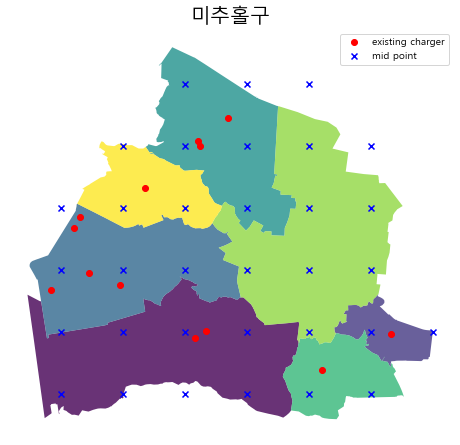

In [33]:
#미추홀구에 존재하는 기존 충전소 위치와 격자 중심점을 시각화
ax = polygon_area.plot(column="SGG_OID", figsize=(8,8), alpha=0.8)
charger_point.plot(ax=ax, marker='o', color='red', label='existing charger')
mid_point.plot(ax=ax, marker='x', color='blue', label='mid point')
ax.set_title("미추홀구", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()


In [5]:
#출처: https://gis.stackexchange.com/questions/207731/generating-random-coordinates-in-multipolygon-in-python
#2차원 데이터 안에 속하는 좌표(POINT)를 랜덤하게 생성하는 알고리즘
import random
from shapely.geometry import Point
from shapely.geometry import Polygon


def generate_random(number, polygon):
    points=[]
    minx, miny, maxx, maxy = polygon.bounds
    while len(points) < number:
        pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if polygon.contains(pnt):
            points.append(pnt)
    return points

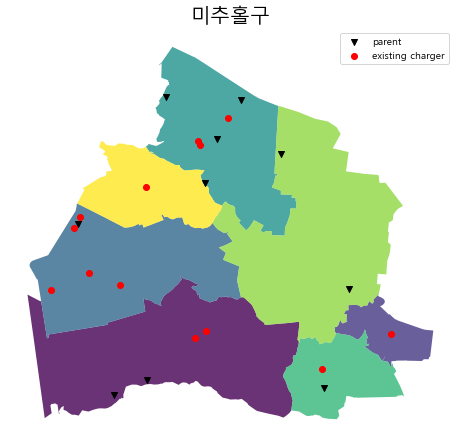

In [83]:
#미추홀구에 속하는 POINT 10개를 랜덤생성한 후 이를 기존 충전소와 함께 시각화 하였다.
#이 첫번째 POINT들이 유전 알고리즘에서 첫 세대로 작용할 예정이다.
random_points ={'geometry':generate_random(10,polygon_area.geometry.unary_union)}

parent = DataFrame(random_points)
parent= gpd.GeoDataFrame(parent, geometry='geometry')

ax = polygon_area.plot(column="SGG_OID", figsize=(8,8), alpha=0.8)
parent.plot(ax=ax, marker='v', color='black', label='parent')
charger_point.plot(ax=ax, marker='o', color='red', label='existing charger')
ax.set_title("미추홀구", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

In [58]:
#새로운 충전소가 설치될 시 격자 중심점과 최근접 충전소 거리(km)를 적절하게 바꿔주는 알고리즘 

#Raw Data는 계속해서 사용해야 하므로 얕은 복사를 통해 복사된 데이터가 변경 되어도 Raw Data의 값은 변경되지 않도록 만든다
copy_distance=copy.copy((data['최근접 충전소 거리(km)'].values.tolist())) #Shallow copy of datafame to list

#최근접 충전소 거리 중에서 가장 큰 값을 가지는 값을 통해 후보군을 좁힌다.
longest_distance=max(data['최근접 충전소 거리(km)'])

def distance_change(individual):
    global copy_distance
    distance_weight=[]
    for i in range(individual.shape[0]): #individual.shape[0]: individual dataframe의 행 갯수
        for j in range(mid_point.shape[0]): 
            if(individual['geometry'][i].buffer(float(longest_distance)*1000).contains(mid_point['geometry'][j])):
                if(float(copy_distance[j])>round(individual['geometry'][i].distance(mid_point['geometry'][j]))*0.001):
                    copy_distance[j]=round(individual['geometry'][i].distance(mid_point['geometry'][j]))*0.001
        norm_distance=[(k-min(copy_distance))/(max(copy_distance)-min(copy_distance)) for k in copy_distance]
        distance_weight.append(sum(norm_distance)*0.204) #0.204: 충전소 거리의 weight
        del copy_distance
        del norm_distance
        copy_distance = copy.copy((data['최근접 충전소 거리(km)'].values.tolist()))
        
    
    return distance_weight #각 individual이 생성되는 데에 따라 갱신되는 최근접 충전소 거리*weight 반환


distance_change(parent)


[2.3668472477301528,
 2.2036058909284404,
 2.3591234028458485,
 2.2226709355211316,
 2.2064742707795246,
 2.3128750907546554,
 2.216566364592437,
 2.32159498318698,
 2.183559426478051,
 2.2982088110219476]

In [8]:
#충전소가 새로 지어질 시에 변하는 데이터는 최근접 충전소 거리이므로 이를 제외한 나머지는 변하지 않는 상수로 취급된다.
constant_potential=sum(norm_data['입지잠재력점수(거리 제외)'].dropna(axis=0))
constant_potential

5.836827816026265

In [84]:
#distance_change(individual)함수에 따른 갱신된 가중치와 constant_potential의 합 중 가장 적은 값과 그 값을 가지는 Point의 좌표를 저장
min_potential=[]
min_point = []
def save_min_point(individual):
    global min_potential
    global min_point
    global constant_potential
    min_potential.append(min(distance_change(individual))+constant_potential)
    min_point.append(individual.iloc[distance_change(individual).index(min(distance_change(individual)))])
    return min_potential, min_point

save_min_point(parent)

([7.964234463440889],
 [geometry    POINT (928133.404 1939185.856)
  Name: 1, dtype: geometry])

In [60]:
#거리를 토대로 fitness 함수를 만들어 rullet wheel을 생성하는 알고리즘
#출처: 이원재, 김학영(2005), "Python 을 사용한 유전 알고리즘 구현", 제23회 한국정보처리학회 춘계학술발표대회 논문집 제12권 제1호 (2005. 5), pp.473~476
import operator
from functools import reduce
def fitness(individual):
    fitness_list =[]
    for i in range(len(individual)):
        #거리는 낮아질수록 더욱 접한한 해에 근접하기 때문에 분모로 각 개체의 거리*weight를 둔다 
        fitness_list.append(sum(distance_change(individual))/distance_change(individual)[i]) 
    
#누적확률변수 리스트를 만들어 각 유전자의 fitness값에 따라 0부터 1까지 rullet wheel을 생산한다.
#즉 fitness값이 높을수록 리스트 내의 공간을 더 많이 점유한다.
#이에 따라 0부터 1까지의 난수를 생성할 시, fitness값이 높을수록 선택될 확률이 높아진다.
    fitness_sum= reduce(operator.add, fitness_list)
    prob_list = map( (lambda x: x/fitness_sum), fitness_list)
    cum_value = 0
    cum_prob_list = [ ]
    for prob in prob_list:
        cum_prob_list.append( cum_value + prob )
        cum_value += prob
    
    cum_prob_list[-1] = 1.0 #리스트[-1]은 제일 마지막에 있는 원소를 나타내므로 누적확률리스트에 적합하게 1을 할당한다.

    return cum_prob_list
fitness(parent)

[0.09579154468478882,
 0.19867925016169116,
 0.29478441940358485,
 0.39678960166861243,
 0.499543554839756,
 0.5975704456127617,
 0.6998565569219986,
 0.7975152594669946,
 0.9013475395248378,
 1.0]

In [11]:
#출처: 이원재, 김학영(2005), "Python 을 사용한 유전 알고리즘 구현", 제23회 한국정보처리학회 춘계학술발표대회 논문집 제12권 제1호 (2005. 5), pp.473~476
#좋은 품질일수록 리스트에서 더 넓은 공간을 차지하므로 선택될 확률이 커진다.
import random
def selection(cum_prob_list, size):
    selected = [] 
    number = size
    for i in range(number):
        rn = random.random() #0 이상 1 미만의 숫자 중에서 random으로 하나 뽑아서 반환하는 함수 호출
        for j, cum_prob in enumerate(cum_prob_list):
            if rn<= cum_prob:
                selected.append(j) #j번째에서 rn<=cum_prob일 경우 selected 리스트에 j를 입력하고 끝낸 후 다시 처음 반복문 실행. 
                break
    return selected

selection(fitness(parent), 10)


#아래 실제 예시를 통해 어떠한 순서의 값들이 선택되었는지 확인할 수 있다.

[0, 6, 2, 5, 2, 7, 4, 5, 8, 2]

In [12]:
#유전 알고리즘의 경우 부모 세대의 특성을 이어받기 때문에 지역적인 최적해로 빠질 가능성이 존재한다.
#이를 돌연변이 알고리즘을 통해 해결할 수 있다.
#프로젝트에서 돌연변이는 미추홀구에 속하는 POINT를 랜덤하게 생성하는 것으로 하였다.
def mutation(number):
    random_mutation ={'geometry':generate_random(number,polygon_area.geometry.unary_union)}

    mutation_point = DataFrame(random_mutation)
    mutation_point = gpd.GeoDataFrame(mutation_point, geometry='geometry')
    return mutation_point

In [102]:
parent

,geometry
0,POINT (925059.000 1939828.432)
1,POINT (925432.683 1942486.453)
2,POINT (927021.792 1938701.727)
3,POINT (926143.920 1939360.320)
4,POINT (924242.767 1937962.648)
5,POINT (927415.712 1937906.665)
6,POINT (925272.606 1941501.569)
7,POINT (927591.793 1940796.848)
8,POINT (927811.804 1941486.137)
9,POINT (923706.348 1937630.081)


In [13]:
#fitness함수에 따른 selection 후 반경 buffer_size(m) 내 임의의 점 재생산
#(size)개의 부모 세대를 선택하여 이 부모 세대의 반경 buffer_size(m)내에 point를 random재생산.

def reproduction(individual, selected, size, buffer_size):
    reproduct= gpd.GeoSeries()
    reproduct_list=[]
    for i in range(size): 
        circle=gpd.GeoSeries(individual.iloc[selected[i]][0].buffer(buffer_size))
        reproduct = reproduct.geometry.append(circle.geometry)
    for i in range(size):
        reproduct_list.append(generate_random(1, reproduct.iloc[i])[0])

    random_points_reproduct={'geometry': reproduct_list}
    reproduct_df=DataFrame(random_points_reproduct)
    reproduct_df=gpd.GeoDataFrame(reproduct_df, geometry='geometry')
    
    return reproduct_df




In [85]:
ancestor = parent
print("반경(m)과 반복 횟수를 공백을 기준으로 입력하세요")
buffer_size, iterator  = map(int, input().split())
print("생성하고 싶은 자손의 개수와 돌연변이의 개수를 공백을 기준으로 입력하세요")
num_descendant, num_mutation  = map(int, input().split())

for i in range(iterator):
    distance_change(ancestor)
    save_min_point(ancestor)
    fitness(ancestor)
    selection(fitness(ancestor), num_descendant)
    ancestor = reproduction(ancestor, selection(fitness(ancestor), num_descendant), num_descendant, buffer_size).append(mutation(num_mutation), ignore_index=True)


반경(m)과 반복 횟수를 공백을 기준으로 입력하세요
200 20
생성하고 싶은 자손의 개수와 돌연변이의 개수를 공백을 기준으로 입력하세요
7 3


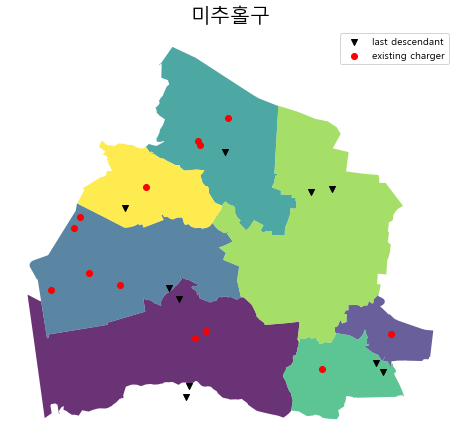

In [86]:
#가장 마지막 자손들과 기존 충전소를 시각화 하였다.
ax = polygon_area.plot(column="SGG_OID", figsize=(8,8), alpha=0.8)
ancestor.plot(ax=ax, marker='v', color='black', label='last descendant')
charger_point.plot(ax=ax, marker='o', color='red', label='existing charger')
ax.set_title("미추홀구", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

In [87]:
#자손들 중에서 가장 적은 입지 잠재력 점수 
min(min_potential)

7.950791005740133

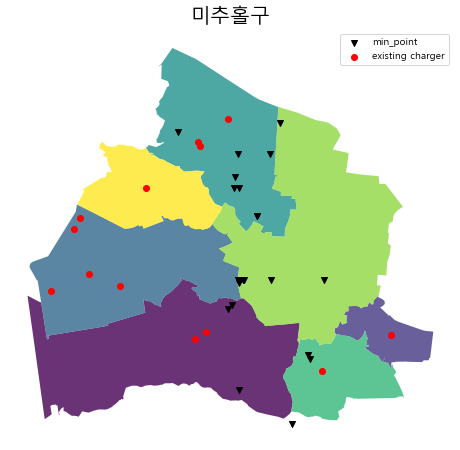

In [74]:
#자손들 중 가장 적은 입지 잠재력 점수를 가지는 point들과 기존 충전소를 시각화하였다.
array = []
for i in range(len(min_point)):
    array.append(min_point[i]['geometry'])

min_points ={'geometry':array}
min_points_df = DataFrame(min_points)
min_points_df= gpd.GeoDataFrame(min_points_df, geometry='geometry')

ax = polygon_area.plot(column="SGG_OID", figsize=(8,8), alpha=0.8)
min_points_df.plot(ax=ax, marker='v', color='black', label='min_point')
charger_point.plot(ax=ax, marker='o', color='red', label='existing charger')
ax.set_title("미추홀구", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

In [88]:
optimal=min_points_df.iloc[min_potential.index(min(min_potential))]
optimal_df= gpd.GeoDataFrame(geometry=optimal)
optimal

geometry    POINT (926449.237 1939351.837)
Name: 14, dtype: geometry

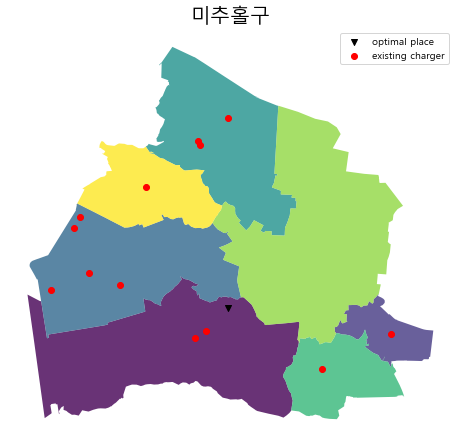

In [82]:
#모든 point들 중 가장 적은 입지잠재력 점수를 가지는 point와 기존 충전소를 시각화하였다.
ax = polygon_area.plot(column="SGG_OID", figsize=(8,8), alpha=0.8)
optimal_df.plot(ax=ax, marker='v', color='black', label='optimal place')

charger_point.plot(ax=ax, marker='o', color='red', label='existing charger')
ax.set_title("미추홀구", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()